In [78]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [79]:
working_dir = r'./gdrive/My Drive/Semester7/MachineLearning/MLProject/'
print(working_dir)

./gdrive/My Drive/Semester7/MachineLearning/MLProject/


In [80]:
import pandas as pd
pd.set_option('display.max_columns', 14)

train_data_path = working_dir + r'train.csv'
train_df = pd.read_csv(train_data_path, sep=",")
print(train_df.shape)
print(train_df.head())

(17176, 14)
      tripid  additional_fare  duration  meter_waiting  meter_waiting_fare  \
0  189123628             10.5     834.0           56.0              0.0000   
1  189125358             10.5     791.0           47.0              0.0000   
2  189125719             10.5    1087.0           80.0              0.0000   
3  189127273             10.5     598.0          271.0             15.6638   
4  189128020              NaN       NaN            NaN                 NaN   

   meter_waiting_till_pickup     pickup_time       drop_time  pick_lat  \
0                       64.0  11/1/2019 0:20  11/1/2019 0:34   6.86252   
1                      134.0  11/1/2019 0:56  11/1/2019 1:09   6.88589   
2                       61.0  11/1/2019 1:08  11/1/2019 1:26   6.90839   
3                       68.0  11/1/2019 2:27  11/1/2019 2:37   6.92570   
4                        NaN  11/1/2019 3:34  11/1/2019 3:51   6.87441   

   pick_lon  drop_lat  drop_lon    fare    label  
0   79.8993   6.90330  

In [82]:
from sklearn.utils import shuffle
train_df = shuffle(train_df)
print(train_df.shape)
print(train_df.head())
train_df.reset_index(drop=True, inplace=True)
print(train_df.head())

(17176, 14)
          tripid  additional_fare  duration  meter_waiting  \
841    190947363             10.5    5862.0         1187.0   
3212   213222200             10.5     461.0          141.0   
9618   191430506             10.5    1097.0           50.0   
12974  207170984             10.5    2579.0         1235.0   
5505   211349930             25.0    2090.0          662.0   

       meter_waiting_fare  meter_waiting_till_pickup       pickup_time  \
841             68.652051                      154.0   11/9/2019 11:32   
3212             8.220300                        3.0   1/30/2020 11:00   
9618             0.000000                       77.0  11/12/2019 13:49   
12974           71.383000                       10.0    1/5/2020 17:18   
5505            38.594600                        0.0    1/22/2020 7:42   

              drop_time  pick_lat  pick_lon  drop_lat  drop_lon     fare  \
841     11/9/2019 13:09   7.15119   79.9456   6.93737   79.8561  1182.71   
3212    1/30/2020 

In [83]:
# import numpy as np

# pickup_times = train_df.get('pickup_time').values.tolist()
# pickup_time = pickup_times[0]
# pickup_time = pickup_time.split(' ')
# print(pickup_time)
# pickup_times = ' '.split(pickup_times)
# pickup_times = np.char.split(pickup_times, sep =' ') 
# print(pickup_times)

#pickup_times = [pickup_time.split(' ') for pickup_time in pickup_times]
#print(pickup_times)

def GiveDayAndTime(time_stamp):
  time_stamp = time_stamp.split(' ')
  date = time_stamp[0].split('/')
  day_of_year = (30 * int(date[0])) + int(date[1])
  day_of_year /= 360

  time = time_stamp[1].split(':')
  min_of_day = (60 * int(time[0])) + int(time[1])
  min_of_day /= 1500

  return day_of_year, min_of_day

# month, day, year
time_stamp = '11/1/2019 0:20'
print(GiveDayAndTime(time_stamp))

(0.9194444444444444, 0.013333333333333334)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb469940940>]],
      dtype=object)

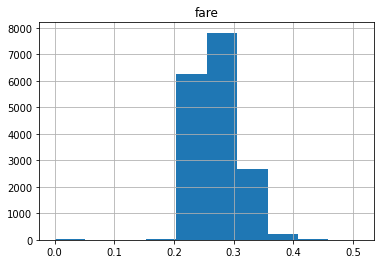

In [0]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

def ScaleData(df, column_name, log_scale=False):
  temp = df.get(column_name).to_numpy()
  if log_scale:
    transformer = FunctionTransformer(np.log1p)
    temp = transformer.transform(temp)
    temp /= 20
  else:
    temp /= 10
  # print(np.nanmax(temp))
  temp = pd.DataFrame({column_name: temp})

  return temp

fares = ScaleData(train_df, 'fare', log_scale=True)
fares.hist(column='fare')

In [0]:
durations = train_df.get('duration').to_numpy()
print(np.nanmax(additional_fares))
# additional_fares /= 1000
additional_fares = pd.DataFrame({'additional_fare': additional_fares})
additional_fares.hist(column='additional_fare')

12795.03


ValueError: ignored

In [0]:
durations = train_df.get('meter_waiting').to_numpy()
transformer = FunctionTransformer(np.log1p)
durations = transformer.transform(durations)
print(np.nanmax(durations))
# durations = pd.DataFrame({'duration': durations})
# durations.hist(column='duration')

13.0250834589379


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0d69f4ac8>]],
      dtype=object)

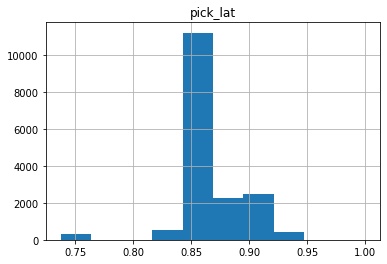

In [0]:
pick_lats = ScaleData(train_df, 'pick_lat')
pick_lats.hist(column='pick_lat')

In [0]:
# month, day, year
time_stamp = '11/1/2019 0:20'

def GiveDayAndTime(time_stamp):
  time_stamp = time_stamp.split(' ')
  date = time_stamp[0].split('/')
  day_of_year = (30 * int(date[0])) + int(date[1])

  time = time_stamp[1].split(':')
  min_of_day = (60 * int(time[0])) + int(time[1])

  return day_of_year, min_of_day

print(GiveDayAndTime(time_stamp))

(331, 20)


In [0]:
pick_lats = train_df.get('pick_lat').to_numpy()
pick_lons = train_df.get('pick_lon').to_numpy()

drop_lats = train_df.get('drop_lat').to_numpy()
drop_lons = train_df.get('drop_lon').to_numpy()

distances = np.hypot((pick_lats - drop_lats), (pick_lons - drop_lons))

distances = pd.DataFrame({'distance': distances})

       distance
0      0.045869
1      0.028500
2      0.057019
3      0.007806
4      0.073717
...         ...
17171  0.019087
17172  0.098307
17173  0.009405
17174  0.026057
17175  0.019155

[17176 rows x 1 columns]


In [84]:
from datetime import datetime

# datetime_str = '09/19/18 13:55:26'
datetime_str = '11/1/2019 0:20'

# datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')
datetime_object = datetime.strptime(datetime_str, '%m/%d/20%y %H:%M')

print(type(datetime_object))
print(datetime_object)  # printed in default format
print(datetime_object.month)
print(datetime_object.day)
print(datetime_object.hour)
print(datetime_object.minute)

<class 'datetime.datetime'>
2019-11-01 00:20:00
11
1
0
20


In [0]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

def ScaleData(df, column_name, log_scale=False, divider=10):
  temp = df.get(column_name).to_numpy()
  if log_scale:
    transformer = FunctionTransformer(np.log1p)
    temp = transformer.transform(temp)
    temp /= 20
  else:
    temp /= divider
  # print(np.nanmax(temp))
  temp = pd.DataFrame({column_name: temp})

  return temp

# fares = ScaleData(train_df, 'fare', log_scale=True)
# fares.hist(column='fare')

In [0]:
import sklearn
import numpy as np

def GetXY(df, needY = True):
  if needY:
    X1 = df.drop(labels=['tripid', 'label', 'pickup_time', 'drop_time', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'fare'], axis=1)
    X2 = df.drop(labels=['tripid', 'label', 'pickup_time', 'drop_time', 'meter_waiting_till_pickup', 'additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare'], axis=1)
  else:
    X1 = df.drop(labels=['tripid', 'pickup_time', 'drop_time', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'fare'], axis=1)
    X2 = df.drop(labels=['tripid', 'pickup_time', 'drop_time', 'meter_waiting_till_pickup', 'additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare'], axis=1)
  # X_temp = df[['pickup_time']]
  # X_temp = X_temp.copy()

  # temp_data = {'day_of_year': [], 'min_of_day': []}
  # rows, _ = X_temp.shape

  # for row in range(rows):
  #  temp_ts = X_temp.loc[row].to_string().split('    ')
  #  temp_ts = GiveDayAndTime(temp_ts[1])
  #  temp_data['day_of_year'].append(temp_ts[0])
  #  temp_data['min_of_day'].append(temp_ts[1])

  # temp_data = pd.DataFrame.from_dict(temp_data)

  # X.reset_index(drop=True, inplace=True)
  # temp_data.reset_index(drop=True, inplace=True)
  # X = pd.concat([X, temp_data], axis=1)
  # pick_lats = train_df.get('pick_lat').to_numpy()
  # pick_lons = train_df.get('pick_lon').to_numpy()

  # drop_lats = train_df.get('drop_lat').to_numpy()
  # drop_lons = train_df.get('drop_lon').to_numpy()

  # distances = np.hypot((pick_lats - drop_lats), (pick_lons - drop_lons))

  # distances = pd.DataFrame({'distance': distances})
  # X.reset_index(drop=True, inplace=True)
  # distances.reset_index(drop=True, inplace=True)
  # X = pd.concat([X, distances], axis=1)
  pickup_times = train_df.get('pickup_time').values.tolist()
  pickup_times = [datetime.strptime(pickup_time, '%m/%d/20%y %H:%M') for pickup_time in pickup_times]
  temp = {'pickup_month': [], 'pickup_day': [], 'pickup_hour': [], 'pickup_min': []}
  for pickup_time in pickup_times:
    temp['pickup_month'].append(pickup_time.month)
    temp['pickup_day'].append(pickup_time.day)
    temp['pickup_hour'].append(pickup_time.hour)
    temp['pickup_min'].append(pickup_time.minute)
  pickup_times = pd.DataFrame(temp)

  drop_times = train_df.get('drop_time').values.tolist()
  drop_times = [datetime.strptime(drop_time, '%m/%d/20%y %H:%M') for drop_time in drop_times]
  temp = {'drop_month': [], 'drop_day': [], 'drop_hour': [], 'drop_min': []}
  for drop_time in drop_times:
    temp['drop_month'].append(drop_time.month)
    temp['drop_day'].append(drop_time.day)
    temp['drop_hour'].append(drop_time.hour)
    temp['drop_min'].append(drop_time.minute)
  drop_times = pd.DataFrame(temp)

  X1.reset_index(drop=True, inplace=True)
  pickup_times.reset_index(drop=True, inplace=True)
  drop_times.reset_index(drop=True, inplace=True)
  X2.reset_index(drop=True, inplace=True)

  X = pd.concat([X1, pickup_times, drop_times, X2], axis=1)

  if needY:
    Y = df["label"]
    col = pd.Categorical(Y, ['incorrect', 'correct'])
    Y = pd.Series(col.codes)
    return X, Y
  else:
    return X

In [0]:
import sklearn
import numpy as np

def GetXY_v2(df, needY = True):
  additional_fares = ScaleData(df, 'additional_fare', log_scale=True)
  durations = ScaleData(df, 'duration', log_scale=True)
  meter_waitings = ScaleData(df, 'meter_waiting', log_scale=True)
  meter_waiting_fares = ScaleData(df, 'meter_waiting_fare', log_scale=True)
  meter_waiting_till_pickups = ScaleData(df, 'meter_waiting_till_pickup', log_scale=True)
  pick_lats = ScaleData(df, 'pick_lat')
  pick_lons = ScaleData(df, 'pick_lon', divider=100)
  drop_lats = ScaleData(df, 'drop_lat')
  drop_lons = ScaleData(df, 'drop_lon', divider=100)
  fares = ScaleData(df, 'fare', log_scale=True)

  # pickup_times = df.get('pickup_time').values.tolist()
  # pickup_times = [GiveDayAndTime(pickup_time) for pickup_time in pickup_times]
  # pickup_times = {'day_of_year': [pickup_time[0] for pickup_time in pickup_times], 'min_of_day': [pickup_time[1] for pickup_time in pickup_times]}
  # pickup_times = pd.DataFrame(pickup_times)
  # print(pickup_times)
  pickup_times = train_df.get('pickup_time').values.tolist()
  pickup_times = [datetime.strptime(pickup_time, '%m/%d/20%y %H:%M') for pickup_time in pickup_times]
  temp = {'pickup_month': [], 'pickup_day': [], 'pickup_hour': [], 'pickup_min': []}
  for pickup_time in pickup_times:
    temp['pickup_month'].append(pickup_time.month / 12.0)
    temp['pickup_day'].append(pickup_time.day / 31.0)
    temp['pickup_hour'].append(pickup_time.hour / 24.0)
    temp['pickup_min'].append(pickup_time.minute / 60.0)
  pickup_times = pd.DataFrame(temp)

  drop_times = train_df.get('drop_time').values.tolist()
  drop_times = [datetime.strptime(drop_time, '%m/%d/20%y %H:%M') for drop_time in drop_times]
  temp = {'drop_month': [], 'drop_day': [], 'drop_hour': [], 'drop_min': []}
  for drop_time in drop_times:
    temp['drop_month'].append(drop_time.month / 12.0)
    temp['drop_day'].append(drop_time.day / 31.0)
    temp['drop_hour'].append(drop_time.hour / 24.0)
    temp['drop_min'].append(drop_time.minute / 60.0)
  drop_times = pd.DataFrame(temp)

  additional_fares.reset_index(drop=True, inplace=True)
  durations.reset_index(drop=True, inplace=True)
  meter_waitings.reset_index(drop=True, inplace=True)
  meter_waiting_fares.reset_index(drop=True, inplace=True)
  meter_waiting_till_pickups.reset_index(drop=True, inplace=True)
  pickup_times.reset_index(drop=True, inplace=True)
  drop_times.reset_index(drop=True, inplace=True)
  pick_lats.reset_index(drop=True, inplace=True)
  pick_lons.reset_index(drop=True, inplace=True)
  drop_lats.reset_index(drop=True, inplace=True)
  drop_lons.reset_index(drop=True, inplace=True)
  fares.reset_index(drop=True, inplace=True)

  X = pd.concat([additional_fares, durations, meter_waitings,
                      meter_waiting_fares, meter_waiting_till_pickups, pickup_times,
                 drop_times, pick_lats, pick_lons, drop_lats, drop_lons, fares],
                axis=1)

  if needY:
    Y = df["label"]
    col = pd.Categorical(Y, ['incorrect', 'correct'])
    Y = pd.Series(col.codes)
    return X, Y
  else:
    return X

In [87]:
# X, Y = GetXY(train_df)
X, Y = GetXY_v2(train_df)
print(X.shape)
print(Y.shape)

(17176, 18)
(17176,)


In [0]:
print(X.head())
print(Y.head())

   additional_fare  duration  meter_waiting  meter_waiting_fare  \
0         0.122117  0.336372       0.202153            0.000000   
1         0.122117  0.333728       0.193560            0.000000   
2         0.122117  0.349605       0.219722            0.000000   
3         0.122117  0.319763       0.280290            0.140662   
4              NaN       NaN            NaN                 NaN   

   meter_waiting_till_pickup  day_of_year  min_of_day  pick_lat  pick_lon  \
0                   0.208719     0.919444    0.013333  0.068625  0.798993   
1                   0.245264     0.919444    0.037333  0.068859  0.798984   
2                   0.206357     0.919444    0.045333  0.069084  0.798651   
3                   0.211705     0.919444    0.098000  0.069257  0.798895   
4                        NaN     0.919444    0.142667  0.068744  0.798615   

   drop_lat  drop_lon      fare  
0  0.069033  0.798783  0.280165  
1  0.069137  0.798923  0.264628  
2  0.069367  0.799146  0.285627 

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X.values.tolist())
# Impute our data, then train
X_imp = imp.transform(X)

# X_train, X_test, y_train, y_test = train_test_split(clean_X, y, test_size=0.20, random_state=seed, shuffle=True, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_imp, Y, test_size=0.20, shuffle=True)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13740, 18)
(13740,)
(3436, 18)
(3436,)


In [0]:
import time
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=500)

eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]

%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=False)
# model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=False)

CPU times: user 8.52 s, sys: 21.4 ms, total: 8.54 s
Wall time: 8.55 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
import time
from sklearn.ensemble import RandomForestClassifier

# eval_set = [(X_train, y_train), (X_test, y_test)]
# eval_metric = ["auc","error"]

model = RandomForestClassifier(n_estimators=100, 
                               random_state=50, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1,
                               max_depth=25,
                               min_impurity_decrease=0.0)

# Fit on training data
%time model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.5s


CPU times: user 6.18 s, sys: 38.7 ms, total: 6.22 s
Wall time: 3.26 s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

pred_test = model.predict(X_test)
pred_train = model.predict(X_train)
print('Train Accuracy: ', accuracy_score(y_train, pred_train))
print('Test Accuraccy: ', accuracy_score(y_test, pred_test))
print('Classification Report:')
print(classification_report(y_test,pred_test))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


Train Accuracy:  0.9973071324599709
Test Accuraccy:  0.9412107101280559
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.44      0.58       324
           1       0.94      0.99      0.97      3112

    accuracy                           0.94      3436
   macro avg       0.91      0.71      0.78      3436
weighted avg       0.94      0.94      0.93      3436



[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished


In [0]:
from matplotlib import pyplot
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [0]:
test_data_path = working_dir + r'test.csv'
test_df = pd.read_csv(test_data_path, sep=",")
print(test_df.shape)

(8576, 13)


In [0]:
# df = pd.DataFrame(data)
selected_columns = test_df[["tripid"]]
trip_ids = selected_columns.copy()
print(trip_ids.shape)

(8576, 1)


In [0]:
# import numpy as np

# test_x = test_df.drop(labels=['tripid', 'pickup_time', 'drop_time'], axis=1)
# test_x = GetXY(test_df, needY=False)
test_x = GetXY_v2(test_df, needY=False)
# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(test_x.values.tolist())
# Impute our data, then train
test_x = imp.transform(test_x)
n = test_df.shape[0]
print(n)
n = int(n / 4)
print(n)

test_x_slice = test_x[:n]
test_x_slice = test_x_slice.copy()
print('shape of slice 1: ' + str(test_x_slice.shape))
test_pred = model.predict(test_x_slice)
test_pred = pd.DataFrame({'prediction': test_pred})
print(test_pred.shape)

test_x_slice = test_x[n:2*n]
test_x_slice = test_x_slice.copy()
print('shape of slice 2: ' + str(test_x_slice.shape))
test_pred_slice = model.predict(test_x_slice)
test_pred_slice = pd.DataFrame({'prediction': test_pred_slice})
test_pred = pd.concat([test_pred, test_pred_slice])
print(test_pred.shape)

test_x_slice = test_x[2*n:3*n]
test_x_slice = test_x_slice.copy()
print('shape of slice 3: ' + str(test_x_slice.shape))
test_pred_slice = model.predict(test_x_slice)
test_pred_slice = pd.DataFrame({'prediction': test_pred_slice})
test_pred = pd.concat([test_pred, test_pred_slice])
print(test_pred.shape)

test_x_slice = test_x[3*n:4*n]
test_x_slice = test_x_slice.copy()
print('shape of slice 3: ' + str(test_x_slice.shape))
test_pred_slice = model.predict(test_x_slice)
test_pred_slice = pd.DataFrame({'prediction': test_pred_slice})
test_pred = pd.concat([test_pred, test_pred_slice])
print(test_pred.shape)

8576
2144
shape of slice 1: (2144, 18)
(2144, 1)
shape of slice 2: (2144, 18)


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


(4288, 1)
shape of slice 3: (2144, 18)
(6432, 1)
shape of slice 3: (2144, 18)


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


(8576, 1)


In [0]:
trip_ids.reset_index(drop=True, inplace=True)
test_pred.reset_index(drop=True, inplace=True)
result = pd.concat([trip_ids, test_pred], axis=1)
print(trip_ids.shape)
print(trip_ids.head())
print(test_pred.shape)
print(test_pred.head())
print(result.shape)
print(result.head())

(8576, 1)
      tripid
0  213284604
1  213286352
2  213293973
3  213294622
4  213298687
(8576, 1)
   prediction
0           1
1           1
2           1
3           1
4           1
(8576, 2)
      tripid  prediction
0  213284604           1
1  213286352           1
2  213293973           1
3  213294622           1
4  213298687           1


In [0]:
pred_data_path = working_dir + r'sample_submission.csv'
print(pred_data_path)
result.to_csv(pred_data_path, index=False)

./gdrive/My Drive/Semester7/MachineLearning/MLProject/sample_submission.csv


In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)